In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

Analyzing demographic breakdown in toxicity

In [2]:
tsv_file = open("./data512/data-512-a2/toxicity_worker_demographics.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

df = []
for row in read_tsv:
    df.append(row)

In [3]:
data = pd.DataFrame(df[1:], columns=['worker_id', 'gender', 'english_first_language', 'age_group', 'education'])

In [4]:
print(data.shape)
data.head()

(3591, 5)


,worker_id,gender,english_first_language,age_group,education
0,85,female,0,18-30,bachelors
1,1617,female,0,45-60,bachelors
2,1394,female,0,,bachelors
3,311,male,0,30-45,bachelors
4,1980,male,0,45-60,masters


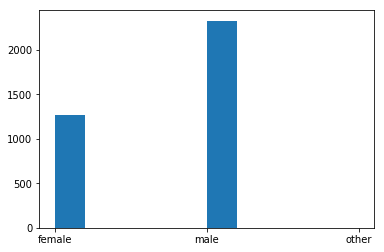

In [5]:
fig = plt.hist(data['gender'])

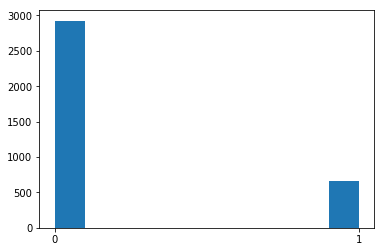

In [6]:
fig2 = plt.hist(data['english_first_language'])

In [7]:
data2 = data[data['age_group'] != '']

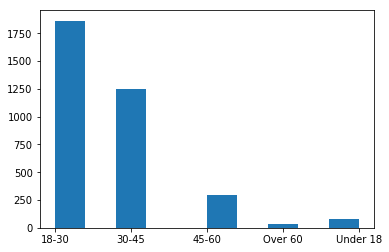

In [8]:
fig3 = plt.hist(data2['age_group'])

Exploring relationships between worker demographics and labelling behabiour

In [2]:
tsv_file = open("./data512/data-512-a2/aggression_worker_demographics.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

df = []
for row in read_tsv:
    df.append(row)

In [3]:
agg_demo = pd.DataFrame(df[1:], columns=['worker_id', 'gender', 'english_first_language', 'age_group', 'education'])

In [4]:
print(agg_demo.shape)
agg_demo.head()

(2190, 5)


,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


In [5]:
tsv_file = open("./data512/data-512-a2/aggression_annotations.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

df = []
for row in read_tsv:
    df.append(row)

In [6]:
agg_labels = pd.DataFrame(df[1:], columns=['rev_id', 'worker_id', 'aggression', 'aggression_score'])

In [7]:
print(agg_labels.shape)
agg_labels.head()

(1365217, 4)


,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [8]:
agg_full = agg_demo.merge(agg_labels, on='worker_id')

In [9]:
print(agg_full.shape)
agg_full.head()

(855514, 8)


,worker_id,gender,english_first_language,age_group,education,rev_id,aggression,aggression_score
0,833,female,0,45-60,bachelors,4763903,0.0,0.0
1,833,female,0,45-60,bachelors,5350726,0.0,0.0
2,833,female,0,45-60,bachelors,5838638,0.0,0.0
3,833,female,0,45-60,bachelors,6270546,0.0,0.0
4,833,female,0,45-60,bachelors,6735507,0.0,0.0


In [10]:
agg_full['aggression_score'] = agg_full['aggression_score'].astype('float')
agg_full['aggression'] = agg_full['aggression'].astype('float')

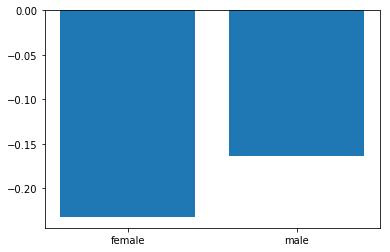

In [23]:
Y = [agg_full[agg_full['gender'] == 'female']['aggression_score'].mean(), agg_full[agg_full['gender'] == 'male']['aggression_score'].mean()]
X = ['female', 'male']
fig = plt.bar(X, Y)

In [16]:
male_counts = agg_full[agg_full['gender'] == 'male'].groupby('aggression_score').count()['gender']
female_counts = agg_full[agg_full['gender'] == 'female'].groupby('aggression_score').count()['gender']

In [17]:
df_plot = pd.DataFrame(male_counts)
df_plot = df_plot.rename(columns={'gender':'male'})
df_plot['female'] = female_counts

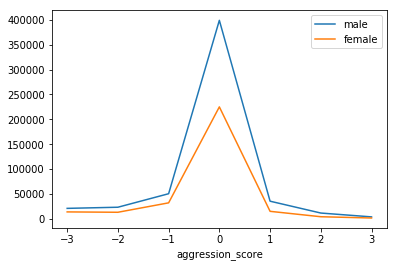

In [18]:
df_plot.plot()